In [1]:
#Import relevant libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import itertools

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.models import load_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
#Import the data and generate Dummy Variables for Movement
dta = pd.read_excel('Full Data - Unseparated.xlsx')
classification_dta=pd.get_dummies(dta, columns=['Movement'])

In [3]:
classification_dta.head()

,Date,Neg,Pos,Net,SC-RPD,SC-Logit,DJIA,N225,HSI,SSE,ER,JKSE,dJKSE,Movement_0,Movement_1
0,2020-04-09,1074,1035,1194,-0.018492,-0.016056,23719.370,19345.769531,24300.330078,2825.904053,15820.00,4649.079102,-12.592529,1,0
1,2020-04-10,15303,6199,24283,-0.423402,-0.392434,23555.070,19498.500000,24367.865235,2796.631104,15725.00,4636.486572,-6.296265,1,0
2,2020-04-11,16804,5511,16002,-0.506072,-0.484156,23472.920,19270.950196,24401.632813,2811.957032,15677.50,4630.190308,-3.148132,1,0
3,2020-04-12,16430,6543,13197,-0.430375,-0.399841,23431.845,19157.175293,24418.516602,2819.619995,15653.75,4627.042175,-3.148132,1,0
4,2020-04-13,19198,7668,16663,-0.429167,-0.398557,23390.770,19043.400391,24426.958496,2783.048096,15630.00,4623.894043,82.597168,0,1


In [3]:
#Define Input and Output for the Model
x=classification_dta.drop(columns=['Date', 'Neg', 'Pos', 'Net', 'SC-Logit', 'JKSE', 'dJKSE', 'Movement_0', 'Movement_1'])
y=classification_dta[['Movement_0', 'Movement_1']]

In [4]:
#Split the Data into Train and Test Batches
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Data Standardization
scaler=StandardScaler()
x_train=pd.DataFrame(scaler.fit_transform(x_train))
x_test=pd.DataFrame(scaler.fit_transform(x_test))

#Neural Network Model Initiation
model=Sequential()

model.add(Dense(4, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='binary_crossentropy',
             optimizer=Adam(learning_rate=0.0008),
             metrics=['accuracy'])

checkpoint = keras.callbacks.ModelCheckpoint('binary_model{epoch:08d}.h5', save_freq=5) 

In [5]:
history=model.fit(x_train, y_train, callbacks= checkpoint, batch_size= 32, epochs= 500, validation_data= (x_test,y_test))

Epoch 1/500
7/7 [==============================] - 0s 32ms/step - loss: 0.7470 - accuracy: 0.5822 - val_loss: 0.7334 - val_accuracy: 0.5926
Epoch 2/500
7/7 [==============================] - 0s 4ms/step - loss: 0.7436 - accuracy: 0.5869 - val_loss: 0.7298 - val_accuracy: 0.5926
Epoch 3/500
7/7 [==============================] - 0s 5ms/step - loss: 0.7407 - accuracy: 0.5915 - val_loss: 0.7264 - val_accuracy: 0.5741
Epoch 4/500
7/7 [==============================] - 0s 4ms/step - loss: 0.7374 - accuracy: 0.5869 - val_loss: 0.7234 - val_accuracy: 0.5741
Epoch 5/500
7/7 [==============================] - 0s 5ms/step - loss: 0.7345 - accuracy: 0.5962 - val_loss: 0.7207 - val_accuracy: 0.5741
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 0.7319 - accuracy: 0.5962 - val_loss: 0.7180 - val_accuracy: 0.5556
Epoch 7/500
7/7 [==============================] - 0s 4ms/step - loss: 0.7292 - accuracy: 0.5962 - val_loss: 0.7155 - val_accuracy: 0.5556
Epoch 8/500
7/7 [=========

7/7 [==============================] - 0s 4ms/step - loss: 0.6716 - accuracy: 0.6197 - val_loss: 0.6527 - val_accuracy: 0.5926
Epoch 118/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6714 - accuracy: 0.6291 - val_loss: 0.6525 - val_accuracy: 0.5741
Epoch 119/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6712 - accuracy: 0.6291 - val_loss: 0.6523 - val_accuracy: 0.5741
Epoch 120/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6711 - accuracy: 0.6291 - val_loss: 0.6521 - val_accuracy: 0.5741
Epoch 121/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6709 - accuracy: 0.6291 - val_loss: 0.6520 - val_accuracy: 0.5741
Epoch 122/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6708 - accuracy: 0.6291 - val_loss: 0.6519 - val_accuracy: 0.5926
Epoch 123/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6706 - accuracy: 0.6291 - val_loss: 0.6518 - val_accuracy: 0.5741
Epoch 124/500
7/7 [========

7/7 [==============================] - 0s 5ms/step - loss: 0.6528 - accuracy: 0.6244 - val_loss: 0.6415 - val_accuracy: 0.5926
Epoch 234/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6526 - accuracy: 0.6244 - val_loss: 0.6416 - val_accuracy: 0.5926
Epoch 235/500
7/7 [==============================] - 0s 6ms/step - loss: 0.6525 - accuracy: 0.6244 - val_loss: 0.6415 - val_accuracy: 0.5926
Epoch 236/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6524 - accuracy: 0.6244 - val_loss: 0.6414 - val_accuracy: 0.5926
Epoch 237/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6523 - accuracy: 0.6291 - val_loss: 0.6415 - val_accuracy: 0.6296
Epoch 238/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6522 - accuracy: 0.6338 - val_loss: 0.6414 - val_accuracy: 0.6296
Epoch 239/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6521 - accuracy: 0.6338 - val_loss: 0.6414 - val_accuracy: 0.6296
Epoch 240/500
7/7 [========

7/7 [==============================] - 0s 3ms/step - loss: 0.6432 - accuracy: 0.6197 - val_loss: 0.6383 - val_accuracy: 0.6296
Epoch 350/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6432 - accuracy: 0.6197 - val_loss: 0.6383 - val_accuracy: 0.6296
Epoch 351/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6431 - accuracy: 0.6197 - val_loss: 0.6383 - val_accuracy: 0.6296
Epoch 352/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6431 - accuracy: 0.6197 - val_loss: 0.6383 - val_accuracy: 0.6296
Epoch 353/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6430 - accuracy: 0.6197 - val_loss: 0.6384 - val_accuracy: 0.6296
Epoch 354/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6429 - accuracy: 0.6197 - val_loss: 0.6384 - val_accuracy: 0.6296
Epoch 355/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6428 - accuracy: 0.6197 - val_loss: 0.6384 - val_accuracy: 0.6296
Epoch 356/500
7/7 [========

7/7 [==============================] - 0s 5ms/step - loss: 0.6376 - accuracy: 0.6291 - val_loss: 0.6375 - val_accuracy: 0.6296
Epoch 466/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6375 - accuracy: 0.6291 - val_loss: 0.6374 - val_accuracy: 0.6296
Epoch 467/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6375 - accuracy: 0.6244 - val_loss: 0.6374 - val_accuracy: 0.6296
Epoch 468/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6374 - accuracy: 0.6291 - val_loss: 0.6373 - val_accuracy: 0.6296
Epoch 469/500
7/7 [==============================] - 0s 4ms/step - loss: 0.6374 - accuracy: 0.6244 - val_loss: 0.6373 - val_accuracy: 0.6296
Epoch 470/500
7/7 [==============================] - 0s 5ms/step - loss: 0.6374 - accuracy: 0.6291 - val_loss: 0.6374 - val_accuracy: 0.6296
Epoch 471/500
7/7 [==============================] - 0s 3ms/step - loss: 0.6373 - accuracy: 0.6291 - val_loss: 0.6374 - val_accuracy: 0.6296
Epoch 472/500
7/7 [========

Text(0, 0.5, 'Loss')

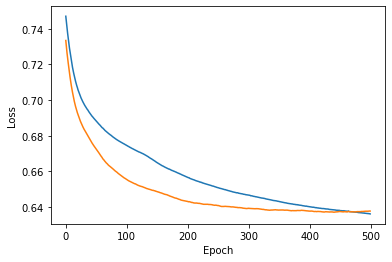

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [6]:
#Import Potential Model
#155, 162
PotModel=load_model('Models/[BEST MODEL] binary4_model00000043.h5')
PotModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 28        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________


In [176]:
# calculate predictions
predict = PotModel.predict(x_train)

# round predictions
round_value = [round(x[0]) for x in predict]
print(round_value)

# evaluate the model
print("testing accuracy")
scores = PotModel.evaluate(x_train, y_train)
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]
testing accuracy
7/7 [==============================] - 0s 334us/step - loss: 0.6912 - accuracy: 0.6103


In [177]:
# calculate predictions
predict = PotModel.predict(x_test)

# round predictions
round_value = [round(x[0]) for x in predict]
print(round_value)

# evaluate the model
print("testing accuracy")
scores = PotModel.evaluate(x_test, y_test)
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
testing accuracy
2/2 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5926


In [169]:
#Import Validation Data
df = pd.read_excel('2021Data.xlsx')
classification_df=pd.get_dummies(df, columns=['Movement'])

In [146]:
classification_df.head()

,Date,Neg,Pos,Net,SC-RPD,DJIA,N225,HSI,SSE,ER,JKSE,dJKSE,Movement_0,Movement_1
0,2021-01-30,1431,618,3107,0.323741,30097.2650,27877.220390,28588.284687,3494.176968,14015.0,5964.947461,51.298731,0,1
1,2021-01-31,10575,3501,23828,0.161690,30154.5875,27984.135586,28740.572031,3499.730452,14012.5,6016.246192,51.298730,0,1
2,2021-02-01,17389,10486,14886,0.027349,30211.9100,28091.050781,28892.859375,3505.283936,14010.0,6067.544922,-23.704102,1,0
3,2021-02-02,15942,7291,12594,0.043239,30687.4800,28362.169922,29248.699219,3533.685059,14020.0,6043.840820,33.904297,0,1
4,2021-02-03,13037,5041,10960,0.142753,30723.6000,28646.500000,29307.460938,3517.308105,14000.0,6077.745117,29.470703,0,1


In [170]:
#Define Input and Output for the Model
x_valid=classification_df.drop(columns=['Date', 'Pos', 'Neg', 'Net', 'JKSE', 'dJKSE', 'Movement_0', 'Movement_1'])
y_valid=classification_df[['Movement_0', 'Movement_1']]

In [171]:
#Data Standardization
x_valid=pd.DataFrame(scaler.fit_transform(x_valid))

In [175]:
# calculate predictions
predict = PotModel.predict(x_valid)

# round predictions
round_value = [round(x[0]) for x in predict]
print(round_value)

# evaluate the model
print("validation accuracy")
scores = PotModel.evaluate(x_valid, y_valid)
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
validation accuracy
4/4 [==============================] - 0s 333us/step - loss: 0.6703 - accuracy: 0.6311


In [79]:
#Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual Movement')
    plt.xlabel('Predicted Movement')

In [139]:
y_pred = np.argmax(predict, axis=1)
y_valid_np = y_valid.to_numpy()
y_valid = np.argmax(y_valid_np, axis=1)

cm = confusion_matrix(y_valid, y_pred)

Confusion matrix, without normalization
[[30 34]
 [11 47]]


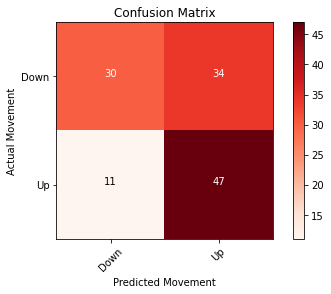

In [140]:
cm_plot_labels=['Down','Up']
plot_confusion_matrix(cm, cm_plot_labels, normalize=False, title='Confusion Matrix')

In [141]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
f1_score(y_valid, y_pred)

0.6762589928057554

In [142]:
recall_score(y_valid, y_pred)

0.8103448275862069

In [143]:
precision_score(y_valid, y_pred)

0.5802469135802469

In [144]:
accuracy_score(y_valid, y_pred)

0.6311475409836066

In [7]:
PotModel.get_weights()

[array([[-0.37173072,  0.5958629 ,  0.40016285, -0.56412905],
        [-0.17799042, -0.6426176 ,  0.38204446,  0.05554897],
        [-0.48850608, -0.5616299 ,  0.14705463, -0.31808946],
        [-0.04601592, -0.4070225 , -0.39421993,  0.64648557],
        [-0.3688887 , -0.26327568, -0.29829755,  0.4138717 ],
        [-0.3892229 , -0.7839111 , -0.37411875, -0.33617115]],
       dtype=float32),
 array([ 0.13013817, -0.11083521, -0.16622609,  0.04994543], dtype=float32),
 array([[ 0.057498  , -0.67823523],
        [-0.32110402,  0.6231728 ],
        [ 0.6928722 ,  0.79478663],
        [-0.5262585 ,  0.39183244]], dtype=float32),
 array([-0.04909183, -0.05980563], dtype=float32)]